In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

### Linear

In [2]:
def approxLinear(X, Y):
  '''
  Calculating an approximation for the linear map for Y = AX

  Params:
  -------
  X : data matrix consisting of the regression data
  Y : labels of the data points in X

  Returns:
  --------
  A : an approximation for the linear regression map
  '''
  return np.linalg.lstsq(X, Y, rcond=None)[0].T

### Nonlinear

In [3]:
def radialFunction(center, X, eps):
  '''
  Calculating the radialfunction on data centered around the center point 

  Params:
  -------
  center : the center of the radial function in which it takes its max
  X : data on which the function should be applied to
  eps : the bandwidth of the function

  Returns:
  --------
  function values after applying the radial function
  '''
  
  return np.exp(-euclidean_distances(X, [center]) ** 2 / eps ** 2)

In [4]:
def radialBase(num_basis, X, eps):
  '''
  Computing the radial base functions

  Params:
  -------
  num_basis : how many basis functions to use
  X : data from which the center points are drawn
  eps : the bandwidth of the radial functions

  Returns:
  --------
  list of radial functions which form the radial base
  '''
  
  centers = np.random.RandomState(seed=42).permutation(len(X))[:num_basis]
  base_functions = [lambda new_data, center = center: radialFunction(center, new_data, eps) for center in X[centers]]
  return base_functions

In [5]:
def radialBasis_transform(base, X):
  '''
  Computing the transformation of the data with the radial base

  Params:
  -------
  base : a radial base computed with radialBase
  X : the data on which the base transform should be applied to

  Returns:
  --------
  the transformed data
  '''
  
  return np.asarray([basis(X) for basis in base]).T[0]

In [6]:
def approxNonLinear(X, Y, num_basis, eps):
  '''
  Calculating the approximation of a nonlinear mapping using radial bases 

  Params:
  -------
  X : data matrix consisting of the regression data
  Y : labels of the data points in X
  num_basis : how many basis functions to use
  eps : the bandwidth of the radial functions

  Returns:
  --------
  an approximation to the coefficients to the basis functions and the base transform itself
  '''
  
  
  base = radialBase(num_basis, X, eps)
  applied_radial_functions = radialBasis_transform(base, X)

  return np.linalg.lstsq(applied_radial_functions, Y, rcond=None)[0].T, base

# Task 1
---

In [7]:
def loadData(filename):
  '''
  Loading data from the given files

  Params:
  -------
  filename : name of the file that contains the data

  Returns:
  --------
  X, Y : the data that is considered in this task
  '''
  
  with open(f'{filename}.txt', 'r') as f:
    data = np.loadtxt(f)
  
    X = data[:, 0].reshape(-1, 1)
    Y = data[:, 1].reshape(-1, 1)
    return X, Y

In [8]:
def plotData(X, Y, transformation, radial=False):
  '''
  Plotting the original data from the data set and plotting the fitted line
  based on if it was a linear transform or a radial basis transform

  Params:
  -------
  X : data matrix consisting of the regression data
  Y : labels of the data points in X
  transformation : the map that is computed in the regression steps
  radial : if True, the radial basis transform was used otherwise it was 
            a linear mapping

  Returns:
  --------
  '''
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.plot(X, Y, 'o', label='Original data', markersize=5)

  plotting_test = np.linspace(min(X), max(X), 5000)
  if radial:
    coeff, base = transformation
    ax.plot(plotting_test, radialBasis_transform(base, plotting_test.reshape(-1, 1)) @ coeff.T, 'r', label='Fitted line')
  else:
    ax.plot(plotting_test, plotting_test.reshape(-1, 1) @ transformation.T, 'r', label='Fitted line')
  ax.set_xlabel('x')
  ax.set_ylabel('y')

  plt.legend()
  plt.show()

### First part
---

In [9]:
X_part1, Y_part1 = loadData('linear_function_data') # loading the data

In [10]:
lin_transform_part1 = approxLinear(X_part1, Y_part1) # approximate with linear map

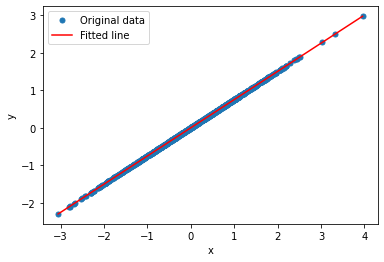

In [11]:
plotData(X_part1, Y_part1, lin_transform_part1) # showing result of approximation

### Second part
---

In [12]:
X_part2, Y_part2 = loadData('nonlinear_function_data') # loading data

In [13]:
fitted_part2 = approxLinear(X_part2, Y_part2) # approximate with linear map

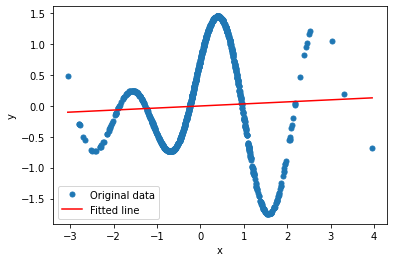

In [14]:
plotData(X_part2, Y_part2, fitted_part2) # showing approximation result

### Third part
---

In [15]:
X_part3, Y_part3 = loadData('nonlinear_function_data') # loading data

In [16]:
eps_part3 = 2 # setting a bandwidth manually since the function seems to be smooth
coeff, base = approxNonLinear(X_part3, Y_part3, 10, eps_part3) 
# calculating the base transform and the coeff for the nonlinear map 

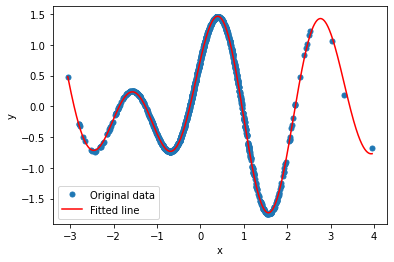

In [17]:
plotData(X_part3, Y_part3, (coeff, base), radial=True) # showing the approximation results